# PLEASE NOTE: Removed the demos to focus on the services....

### The results of this analysis are the actual services we should focus on....
##### NEED TO CHECK THIS ASSUMPTION


#### Other assumptions that I need to check on: 

- RF, DT, ET does looking at a whole bunch (of iterations) make sense??? Or is one enough???

In [1]:
# Load necessary libraries and tools...

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import math
import psycopg2 as psy
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import pandas.io.sql as psql
%matplotlib inline


In [3]:
# Loading data from csv files...

In [4]:
cohort_1_w1w2 = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/cohort_1_w1w2.csv')
cohort_1_w1w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,9,10,11,12,16,20,23,26,29,30,31,32,33,36,38,39,40,41,43,44,45,46,51,52,53,56,59,60,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,AcSuppSv,AgeMP,AmIAKN,Asian,Baseline,BlkAfrAm,BudgetSv,CareerSv,CurrFTE,...,Sex,SpecEdSv,St,StFCID,StFIPS,SubAbuse,TribeSv,Wave,Weight,White
0,0,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450290395006,2.0,Yes,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
1,4,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450448396586,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0
2,10,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450540097503,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
3,14,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,1.0,0.0,AK,AK450652098623,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,3.31,1.0
4,17,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,1.0,AK,AK451448406587,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0


In [5]:
cohort_1_w1w2.columns

Index([u'Unnamed: 0', u'AcSuppSv', u'AgeMP', u'AmIAKN', u'Asian', u'Baseline',
       u'BlkAfrAm', u'BudgetSv', u'CareerSv', u'CurrFTE', u'CurrPTE',
       u'CurrenRoll', u'DOB', u'DelinqntSv', u'EdLevlSv', u'EducFinaSv',
       u'Elig19', u'EmplyTrSv', u'FCStatSv', u'FY', u'FY11Cohort',
       u'FamSuppSv', u'HawaiiPI', u'HighEdCert', u'HisOrgin', u'HlthEdSv',
       u'Homeless', u'HousEdSv', u'ILNAsv', u'InSample', u'Incarc',
       u'Medicaid', u'MedicalIn', u'MentlHlthIn', u'MentorSv', u'Num_services',
       u'OthrFinAs', u'OthrFinaSv', u'OthrHlthIn', u'OutcmDte', u'OutcmFCS',
       u'OutcmRpt', u'PSEdSuppSv', u'PrescripIn', u'PubFinAs', u'PubFoodAs',
       u'PubHousAs', u'Race', u'RaceDcln', u'RaceEthn', u'RaceUnkn',
       u'RepDate_outcomes', u'RepDate_services', u'Responded', u'RmBrdFASv',
       u'SILsv', u'SampleState', u'Sex', u'SpecEdSv', u'St', u'StFCID',
       u'StFIPS', u'SubAbuse', u'TribeSv', u'Wave', u'Weight', u'White'],
      dtype='object')

# 1) Preprocess data and separate target variables from feature variables

In [6]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['PubFoodAs','PubHousAs','OthrFinAs','HighEdCert','CurrFTE','CurrPTE', \
                     'PubFinAs','CurrenRoll','PrescripIn','Homeless','SubAbuse','Incarc','Medicaid','OthrHlthIn','MedicalIn','MentlHlthIn', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv','Wave']]


In [7]:
# # Create column for number of services received

services_count = features.T
services_count = services_count.drop('Wave')



features['Num_services'] = (services_count == 1).sum()
features.head(10)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave,Num_services
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Wave 1: Age 17 Baseline Survey,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wave 1: Age 17 Baseline Survey,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Wave 1: Age 17 Baseline Survey,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wave 1: Age 17 Baseline Survey,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Wave 1: Age 17 Baseline Survey,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Wave 1: Age 17 Baseline Survey,1
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Wave 1: Age 17 Baseline Survey,4
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Wave 1: Age 17 Baseline Survey,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Wave 1: Age 17 Baseline Survey,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Wave 1: Age 17 Baseline Survey,2


In [8]:
# Let's focus on just W2 targets and features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_2 = features.copy()

features_w2 = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2 = features_w2.drop('Wave', axis = 1)


features_w2.head()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

targets_w2_ = targets[targets.Wave == "Wave 2: Age 19 Followup"]
targets_w2_ = targets_w2_.drop('Wave', axis = 1)


targets_w2 = targets_w2_.copy()

for column in targets_w2:
    targets_w2[column] = le.fit_transform(targets_w2[column])
targets_w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,PubFinAs,CurrenRoll,PrescripIn,Homeless,SubAbuse,Incarc,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn
7328,4,2,2,7,2,2,2,2,4,3,2,2,4,4,4,4
7329,2,2,2,5,2,2,2,2,4,2,2,2,3,4,4,4
7330,4,2,2,5,2,2,2,3,4,2,3,3,4,4,4,4
7331,4,2,2,5,2,3,2,2,4,3,2,2,4,4,4,4
7332,4,2,2,5,3,2,2,2,4,3,2,2,4,5,2,4


In [10]:
# y = 0 v 1, 
    # where 1 = Vocational certificate (8), Vocational license (9), Associate's Degree (6), 
            #   Higher degree (1), Bachelor's Degree (2)
    # or 1 = when CurrenRoll == 3

def determine_Success(row):
    column_1 = 'HighEdCert'
    column_2 = 'CurrenRoll'
    if row[column_1] == 1:
        val = 1
    elif row[column_1] ==  2:
        val = 1
    elif row[column_1] ==  6:
        val = 1
    elif row[column_1] ==  9:
        val = 1
    elif row[column_1] ==  8:
        val = 1
    elif row[column_2] == 3:
        val = 1
    else:
        val = 0
    return val
    
targets_w2_final = targets_w2.copy()

targets_w2_final['Success'] = targets_w2_final.apply(determine_Success, axis=1)
targets_w2_final.head(10)



,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,PubFinAs,CurrenRoll,PrescripIn,Homeless,SubAbuse,Incarc,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Success
7328,4,2,2,7,2,2,2,2,4,3,2,2,4,4,4,4,0
7329,2,2,2,5,2,2,2,2,4,2,2,2,3,4,4,4,0
7330,4,2,2,5,2,2,2,3,4,2,3,3,4,4,4,4,1
7331,4,2,2,5,2,3,2,2,4,3,2,2,4,4,4,4,0
7332,4,2,2,5,3,2,2,2,4,3,2,2,4,5,2,4,0
7333,3,3,2,7,2,2,3,3,4,2,2,2,4,4,4,4,1
7334,3,3,2,7,2,2,3,3,5,2,2,2,4,5,5,5,1
7335,2,2,2,5,2,2,2,2,5,2,2,2,4,5,5,3,0
7336,4,2,2,7,3,2,2,2,4,3,2,3,4,4,4,4,0
7337,2,1,3,7,2,2,1,3,4,3,2,3,4,4,4,4,1


# 2) PCA over feature (x) variables

In [11]:
# x-correlations

In [12]:
x_corr = np.corrcoef(features_w2.values.T)
features_w2.corr()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Num_services
ILNAsv,1.000000,0.998852,0.999198,0.999006,0.999071,0.999044,0.999033,0.999059,0.999034,0.999128,0.999318,0.999379,0.999255,0.999129,-0.241584
AcSuppSv,0.998852,1.000000,0.999307,0.999233,0.999277,0.999177,0.999200,0.999248,0.999216,0.999249,0.999354,0.999376,0.999287,0.999174,-0.234288
PSEdSuppSv,0.999198,0.999307,1.000000,0.999427,0.999443,0.999379,0.999404,0.999363,0.999400,0.999426,0.999575,0.999604,0.999583,0.999471,-0.237396
CareerSv,0.999006,0.999233,0.999427,1.000000,0.999340,0.999379,0.999344,0.999363,0.999321,0.999275,0.999389,0.999420,0.999356,0.999252,-0.230502
EmplyTrSv,0.999071,0.999277,0.999443,0.999340,1.000000,0.999359,0.999345,0.999333,0.999342,0.999380,0.999498,0.999524,0.999467,0.999360,-0.235841
BudgetSv,0.999044,0.999177,0.999379,0.999379,0.999359,1.000000,0.999461,0.999428,0.999347,0.999297,0.999412,0.999456,0.999358,0.999238,-0.231174
HousEdSv,0.999033,0.999200,0.999404,0.999344,0.999345,0.999461,1.000000,0.999409,0.999368,0.999268,0.999438,0.999448,0.999353,0.999271,-0.230791
HlthEdSv,0.999059,0.999248,0.999363,0.999363,0.999333,0.999428,0.999409,1.000000,0.999421,0.999315,0.999395,0.999444,0.999348,0.999251,-0.229853
FamSuppSv,0.999034,0.999216,0.999400,0.999321,0.999342,0.999347,0.999368,0.999421,1.000000,0.999370,0.999438,0.999498,0.999403,0.999329,-0.232982
MentorSv,0.999128,0.999249,0.999426,0.999275,0.999380,0.999297,0.999268,0.999315,0.999370,1.000000,0.999559,0.999591,0.999510,0.999436,-0.239316


In [13]:
# Obtaining eigenvalues and eigenvectors for PCA

eig_valsX, eig_vecsX = np.linalg.eig(x_corr)
print eig_valsX
print eig_vecsX

[  1.40519209e+01   9.40168409e-01   1.17739436e-03   2.22620627e-04
   2.62735896e-04   9.33475134e-04   8.51775154e-04   3.51368389e-04
   4.69711521e-04   7.23580518e-04   5.10398832e-04   5.48081909e-04
   5.87330018e-04   6.18081487e-04   6.54163777e-04]
[[  2.66608558e-01  -1.32183806e-02  -8.68409437e-01  -6.26140207e-02
    7.50427260e-02   1.49844968e-02  -3.80290663e-01  -7.90279560e-02
   -7.34126141e-02   3.50263715e-02  -2.04573006e-02   5.22486838e-02
   -6.26861432e-02  -1.65054660e-02   8.15424700e-04]
 [  2.66600766e-01  -2.10010442e-02   4.30772754e-01  -1.90230272e-02
    7.60116696e-02  -2.84286317e-01  -7.53294745e-01  -4.74974771e-02
   -8.67146405e-02   1.07692486e-01  -1.33400538e-01   3.78092092e-02
    2.83930524e-02   1.87978413e-01  -1.08471610e-01]
 [  2.66665649e-01  -1.77483218e-02   3.08534806e-03   3.53249350e-02
    2.53448270e-03  -1.13271207e-01   6.48190835e-02  -2.57521427e-01
    8.35499819e-01  -2.66260544e-01  -3.60007561e-02   5.08121131e-02
  

In [14]:
# Obtaining cumulative explained variance...

totX = sum(eig_valsX)
var_expX = [(i / totX)*100 for i in sorted(eig_valsX, reverse=True)]
cum_var_expX = np.cumsum(var_expX)
print cum_var_expX

[ 93.67947249  99.94726188  99.95511118  99.96133435  99.96701285
  99.97183672  99.97619781  99.98031835  99.98423389  99.98788776
  99.99129042  99.99442183  99.99676429  99.99851586 100.        ]


In [15]:
# From output of cell above, we can see 
# that the first two principal components explain 94.8% of the variance in the target variables

In [16]:
# Obtaining eigenpairs

value_vector_pairsX = [[eig_valsX[i], eig_vecsX[:,i]] for i in range(len(eig_valsX))]
value_vector_pairsX.sort(reverse=True)

In [17]:
# Transforming eigen data to obtain 2d PCA projection matrix in order to plot principal components

weight_2d_projectionX = np.hstack((value_vector_pairsX[0][1].reshape(eig_vecsX.shape[1],1),
                                  value_vector_pairsX[1][1].reshape(eig_vecsX.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projectionX

Weight data 2d PCA projection matrix:
[[ 0.26660856 -0.01321838]
 [ 0.26660077 -0.02100104]
 [ 0.26666565 -0.01774832]
 [ 0.26660439 -0.02504467]
 [ 0.26664217 -0.01938467]
 [ 0.26661199 -0.02433698]
 [ 0.26661028 -0.02474236]
 [ 0.26660639 -0.02574014]
 [ 0.2666236  -0.02241804]
 [ 0.26666019 -0.01569379]
 [ 0.26672708 -0.0075688 ]
 [ 0.26671778 -0.01166433]
 [ 0.26669905 -0.01196572]
 [ 0.26667074 -0.01309313]
 [-0.0677957  -0.99746799]]


In [18]:
Zx = features_w2.dot(weight_2d_projectionX)


### PC1 vs PC2

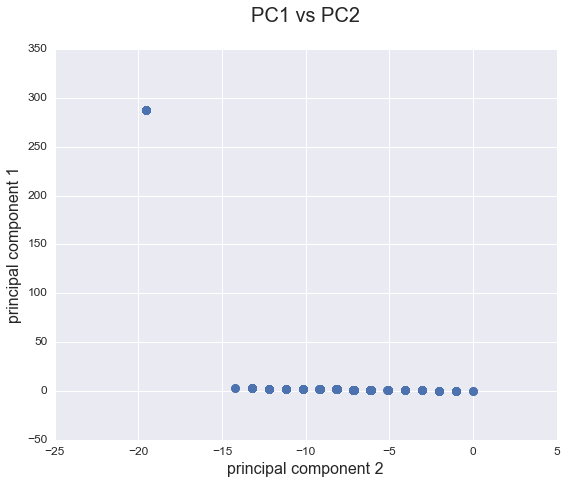

In [19]:
figX = plt.figure(figsize=(9,7))

ax = figX.gca()
ax = sns.regplot(Zx.iloc[:,1], Zx.iloc[:,0],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 2', fontsize=16)
ax.set_ylabel('principal component 1', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

In [20]:
# Will now transform data so that PC1 and PC2 can be plotted with individual feature variables...
# Need to do this in order to see which variables are more likely part of the principal components...

features_2_ = features_w2

features_pcs = features_2_.copy

features_pcs = (features_2_ - features_2_.mean()) / features_2_.std()

features_pcs['PC2'] = Zx.iloc[:,0]
features_pcs['PC1'] = Zx.iloc[:,1]

In [21]:
features_pcs = pd.melt(features_pcs, id_vars=['PC2','PC1'])


In [22]:
features_pcs.head()

,PC2,PC1,variable,value
0,0.397690,-2.032771,ILNAsv,-0.235242
1,0.198813,-1.010686,ILNAsv,-0.167430
2,0.596591,-3.030681,ILNAsv,-0.167430
3,0.198813,-1.010686,ILNAsv,-0.167430
4,0.397688,-2.021247,ILNAsv,-0.167430


### PC1 vs Feature Variables

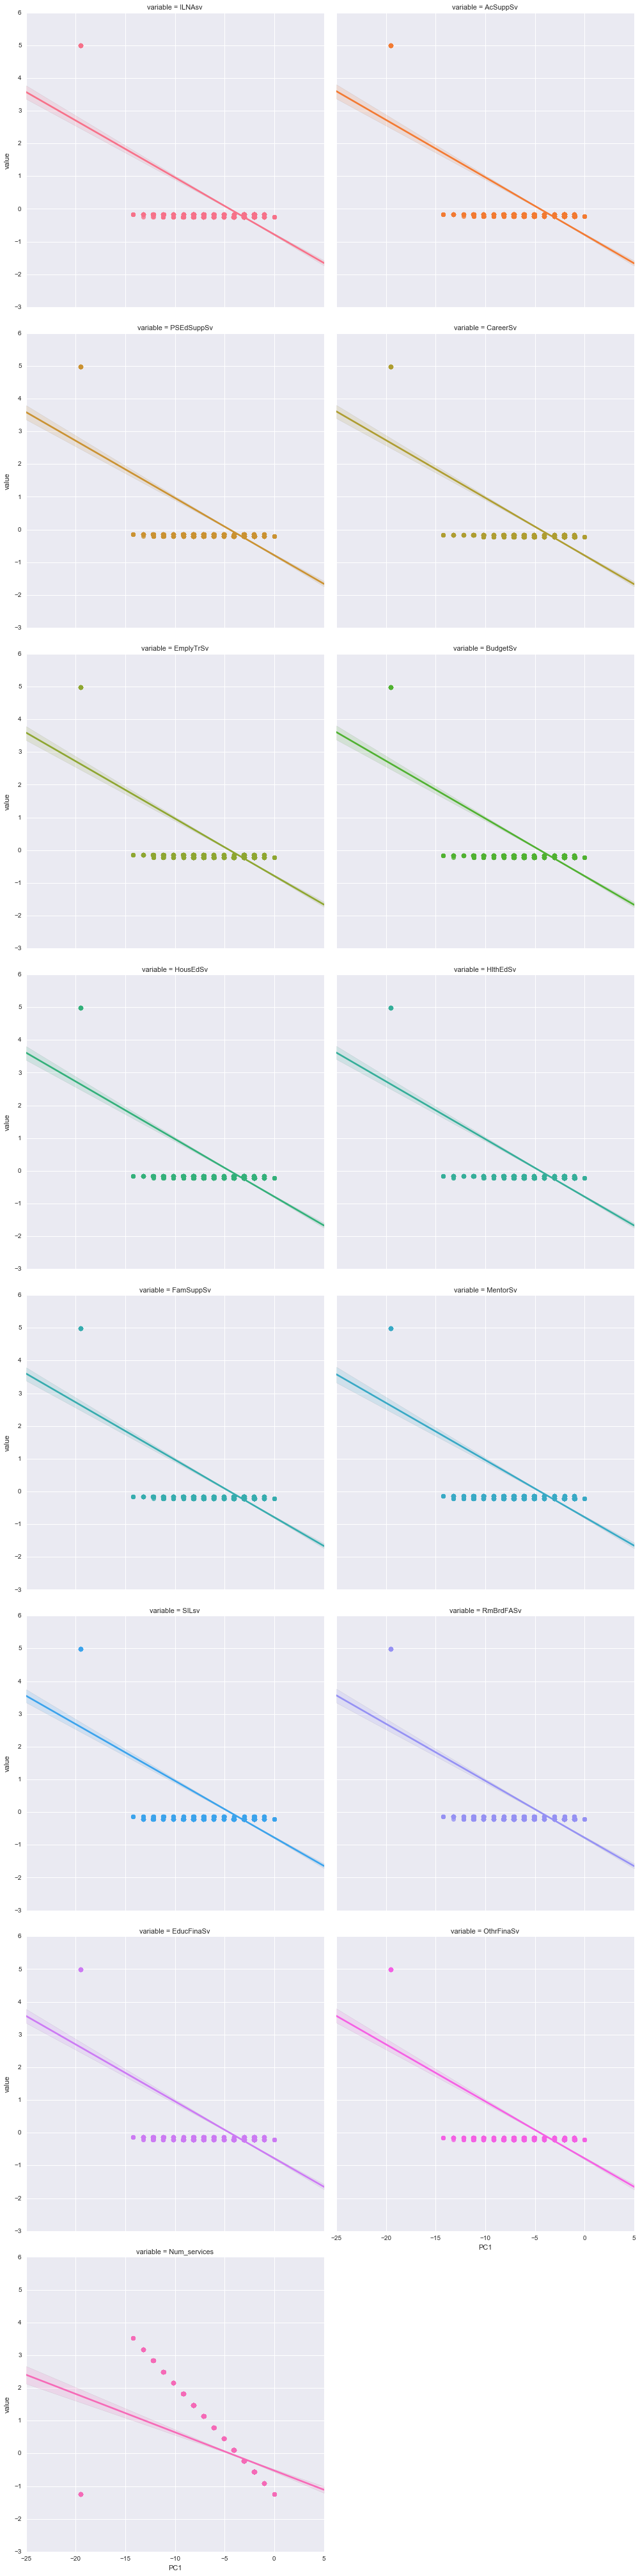

In [23]:
pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=features_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

### PC2 vs Feature Variables

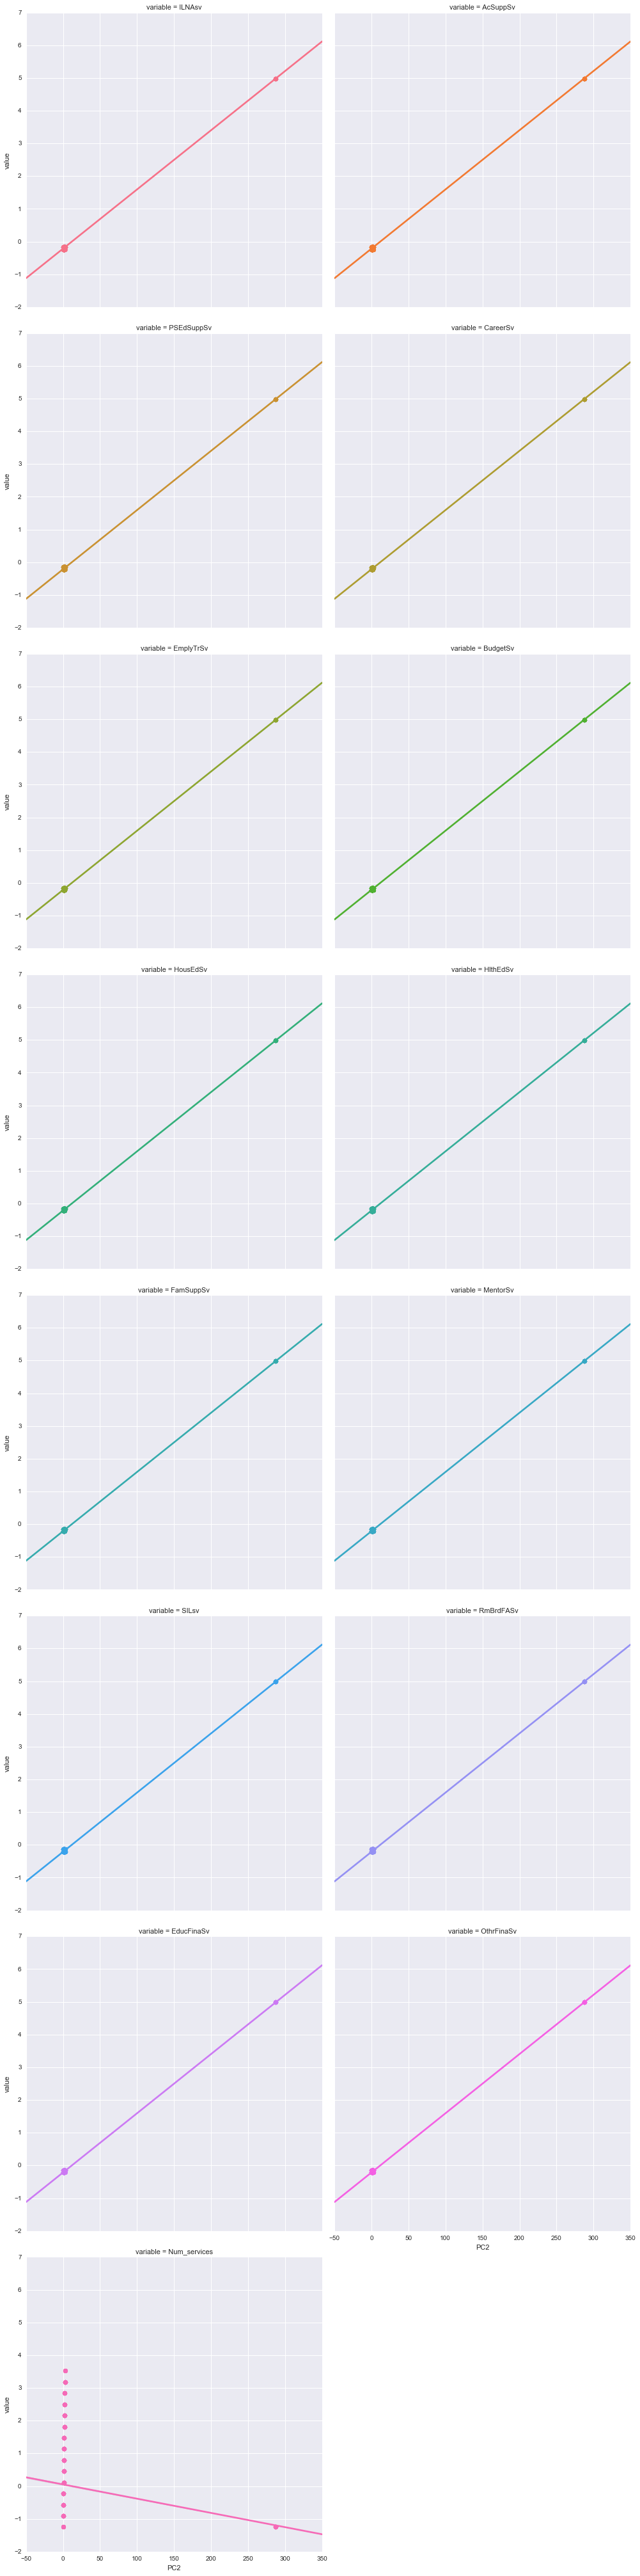

In [24]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=features_pcs, col_wrap=2, size=7, scatter_kws={'s':50})


In [23]:
# From the PCAs so far, can see that State and Num_services should be kept as feature variables for this project

### PC1 vs PC2 WITH LABELS

In [24]:
targets_w2_final.columns.get_loc('Success')

16

In [25]:
# Establish x and y variables. HighEdCert will be target variable for this analysis...
x = features_w2.ix[:,:].values
y = targets_w2_final.ix[:,16].values

In [26]:
# Standardize data

from sklearn.preprocessing import StandardScaler

xStand = StandardScaler().fit_transform(x)

In [27]:
# Calculate eigenvectors and eigenvalues from covariance matrix.

covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [28]:
print(eigenValues)
print(eigenVectors)

[  1.40538387e+01   9.40296724e-01   1.17755505e-03   9.33602536e-04
   8.51891406e-04   2.22651011e-04   2.62771754e-04   3.51416345e-04
   4.69775628e-04   7.23679273e-04   5.10468492e-04   5.48156712e-04
   5.87410178e-04   6.18165844e-04   6.54253058e-04]
[[  2.66608558e-01  -1.32183806e-02   8.68409437e-01   1.49844968e-02
    3.80290663e-01  -6.26140207e-02  -7.50427260e-02   7.90279560e-02
    7.34126141e-02   3.50263715e-02  -2.04573006e-02   5.22486838e-02
   -6.26861432e-02  -1.65054660e-02   8.15424703e-04]
 [  2.66600766e-01  -2.10010442e-02  -4.30772754e-01  -2.84286317e-01
    7.53294745e-01  -1.90230272e-02  -7.60116696e-02   4.74974771e-02
    8.67146405e-02   1.07692486e-01  -1.33400538e-01   3.78092092e-02
    2.83930524e-02   1.87978413e-01  -1.08471610e-01]
 [  2.66665649e-01  -1.77483218e-02  -3.08534806e-03  -1.13271207e-01
   -6.48190835e-02   3.53249350e-02  -2.53448267e-03   2.57521427e-01
   -8.35499819e-01  -2.66260544e-01  -3.60007562e-02   5.08121131e-02
  

In [29]:
# Sorting eigenpairs from highest to lowest

eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

14.0538387011
0.940296724187
0.00117755504836
0.000933602536145
0.000851891406053
0.000723679273308
0.00065425305793
0.000618165843987
0.00058741017783
0.000548156711817
0.000510468491769
0.000469775628187
0.000351416344756
0.000262771754452
0.000222651011096


In [30]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [31]:
print(varExpl)


[93.679472491968596, 6.2677893905711599, 0.007849295705376718, 0.0062231675603475201, 0.0056785010299782021, 0.00482387011966013, 0.0043610918444833714, 0.0041205432486301529, 0.0039155334542965506, 0.0036538793918129021, 0.003402658878446803, 0.0031314101416744108, 0.0023424559297948459, 0.0017515726390723648, 0.001484137516651706]


In [32]:
cvarex = np.cumsum(varExpl)


In [33]:
print(cvarex)

[ 93.67947249  99.94726188  99.95511118  99.96133435  99.96701285
  99.97183672  99.97619781  99.98031835  99.98423389  99.98788776
  99.99129042  99.99442183  99.99676429  99.99851586 100.        ]


In [39]:
from sklearn.decomposition import PCA 


pcask = PCA(n_components=2)
print pcask.fit(xStand).components_ # See the eigenvectors
xPC = pcask.fit_transform(xStand) # Use the eigenvectors to transform xStand onto new axes

[[ 0.26660856  0.26660077  0.26666565  0.26660439  0.26664217  0.26661199
   0.26661028  0.26660639  0.2666236   0.26666019  0.26672708  0.26671778
   0.26669905  0.26667074 -0.0677957 ]
 [-0.01321838 -0.02100104 -0.01774832 -0.02504467 -0.01938467 -0.02433698
  -0.02474236 -0.02574014 -0.02241804 -0.01569379 -0.0075688  -0.01166433
  -0.01196572 -0.01309313 -0.99746799]]


In [40]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2'])


In [41]:
features_2_ = features_w2


In [42]:
features_pca = features_2_.join(PCdf, on=None, how='left')


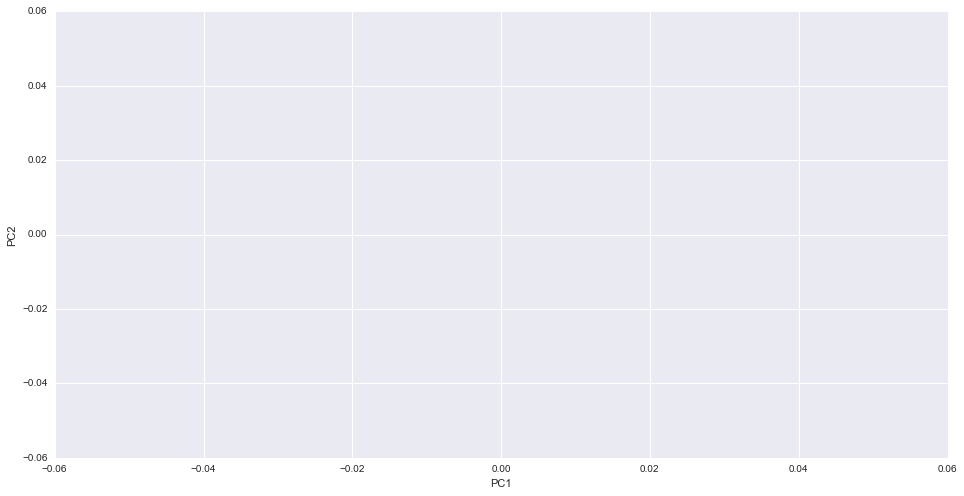

In [43]:
graph = features_pca.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8))

for i, feature in enumerate(targets_w2_final['Success']):
    graph.annotate(feature, (features_pca.iloc[i].PC1, features_pca.iloc[i].PC2))

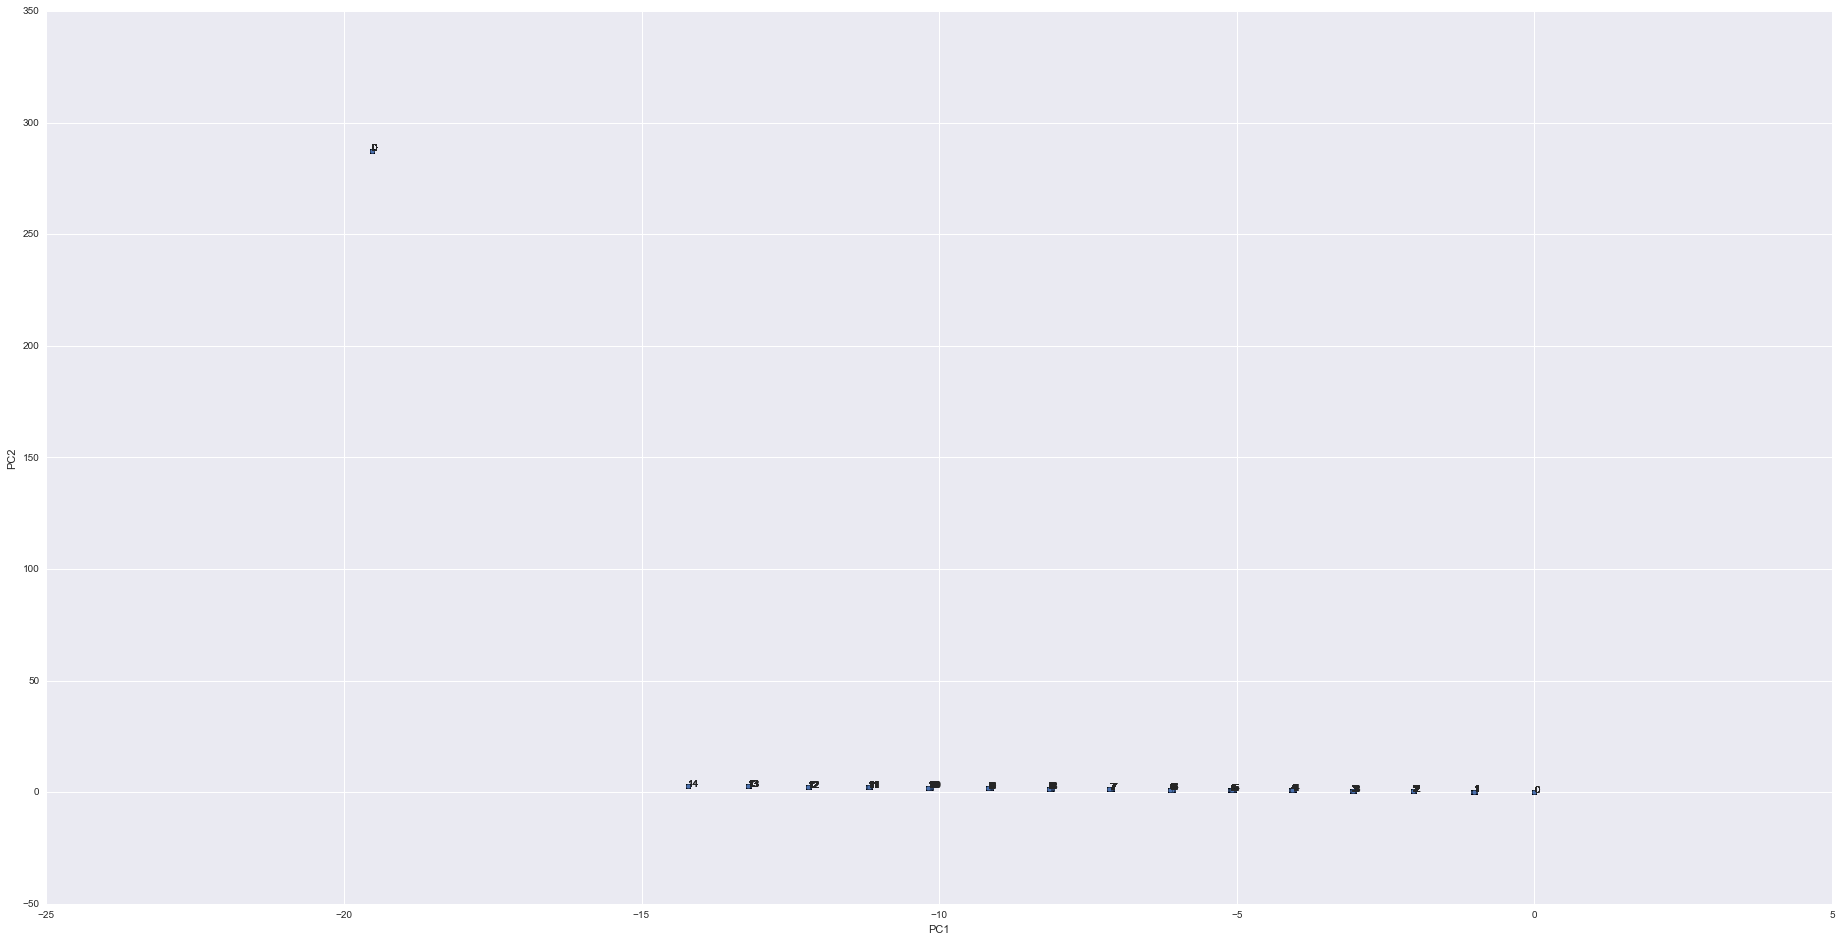

In [44]:
graph = features_pcs.plot(kind='scatter', x='PC1', y='PC2', figsize=(32,16))

for i, feature in enumerate(features_w2['Num_services']):
    graph.annotate(feature, (features_pcs.iloc[i].PC1, features_pcs.iloc[i].PC2))

In [45]:
from matplotlib.mlab import PCA
#construct your numpy array of data
myData = np.array(features_w2) 
results = PCA(myData) 

#this will return an array of variance percentages for each component
results.fracs

#this will return a 2d array of the data projected into PCA space
results.Y 

array([[ -7.42161916e-01,   6.19825946e-01,   1.27331014e-02, ...,
         -2.56228460e-02,   4.48299170e-03,   1.86144974e-03],
       [ -7.37029121e-01,   9.61425820e-01,  -4.58101749e-02, ...,
          2.80986467e-04,   5.61948935e-05,   5.21658495e-04],
       [ -7.47231632e-01,   2.79858906e-01,  -5.71255457e-02, ...,
          2.00780947e-02,   2.12229126e-02,  -2.32398353e-02],
       ..., 
       [ -7.42125738e-01,   6.19900646e-01,   4.05089456e-02, ...,
         -2.82811756e-03,   5.98754373e-03,   9.01538182e-04],
       [ -7.62304192e-01,  -7.46314771e-01,  -7.19806699e-03, ...,
          4.73449574e-03,   8.48173422e-03,  -3.09905990e-03],
       [ -7.42087049e-01,   6.19745844e-01,  -4.41657320e-02, ...,
          7.69094286e-04,  -8.28580807e-04,  -8.10609557e-05]])

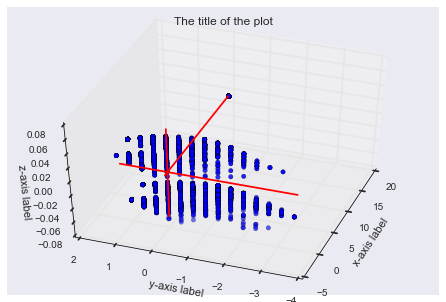

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for item in results.Y:
 x.append(item[0])
 y.append(item[1])
 z.append(item[2])

plt.close('all') # close all latent plotting windows
fig1 = plt.figure() # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("x-axis label") 
ax.set_ylabel("y-axis label")
ax.set_zlabel("z-axis label")
ax.set_title("The title of the plot")

ax.azim = 200
ax.elev = 45

plt.show() # show the plot


# 3) Feature Importance with Tree-Based Models

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = targets_w2_final['Success']
X = features_w2.drop('Num_services', axis = 1)

In [12]:
X.head()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
y

7328     0
7329     0
7330     1
7331     0
7332     0
7333     1
7334     1
7335     0
7336     0
7337     1
7338     1
7339     0
7340     0
7341     1
7342     1
7343     0
7344     0
7345     0
7346     1
7347     0
7348     0
7349     1
7350     0
7351     0
7352     0
7353     1
7354     0
7355     0
7356     0
7357     1
        ..
14626    0
14627    0
14628    0
14629    0
14630    0
14631    0
14632    0
14633    0
14634    1
14635    0
14636    1
14637    1
14638    0
14639    0
14640    0
14641    0
14642    0
14643    0
14644    1
14645    0
14646    0
14647    0
14648    0
14649    0
14650    0
14651    0
14652    0
14653    0
14654    0
14655    1
Name: Success, dtype: int64

In [14]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
pd.Series(y).value_counts()


0    4830
1    2498
Name: Success, dtype: int64

In [16]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
ILNAsv,0.393416
FamSuppSv,0.152552
OthrFinaSv,0.143550
EmplyTrSv,0.117088
SILsv,0.092783


In [18]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(-1, 14)

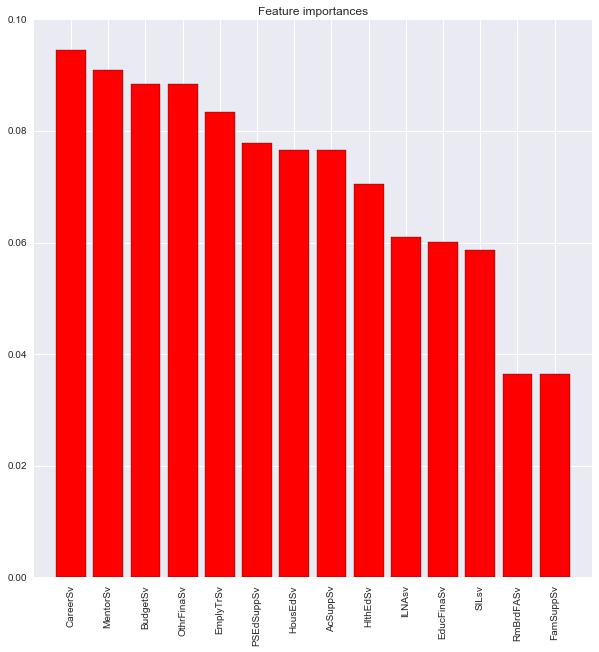

In [19]:
all(rf.feature_importances_ == np.mean([dt.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

,dt_importance,rf_importance,et_importance
CareerSv,0.085377,0.094531,0.082246
MentorSv,0.064104,0.091022,0.046321
BudgetSv,0.091489,0.088471,0.066719
OthrFinaSv,0.077538,0.088429,0.069931
EmplyTrSv,0.080108,0.083475,0.091268
PSEdSuppSv,0.069295,0.077791,0.089256
HousEdSv,0.108249,0.076622,0.090807
AcSuppSv,0.094936,0.076558,0.071728
HlthEdSv,0.091682,0.070456,0.076328
ILNAsv,0.017726,0.061011,0.074115


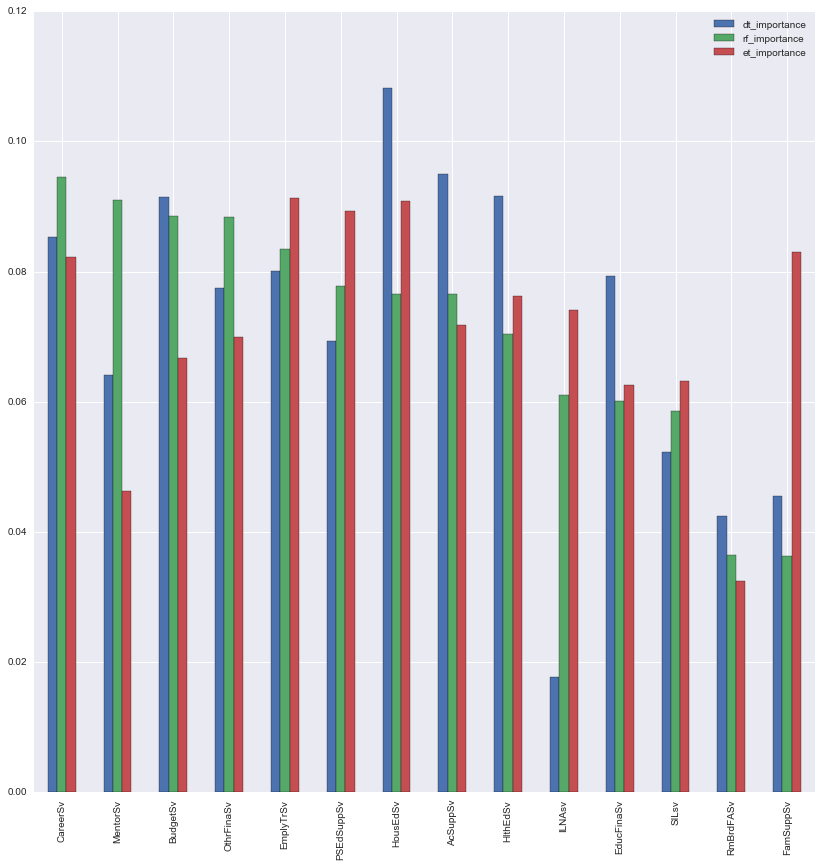

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

et.fit(X, y)

importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar', figsize=(14,14))
importances.head(19)

In [21]:
importances_et = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('et_importance',
                                                                   ascending=False)

                           
importances_et.head(19)

,dt_importance,rf_importance,et_importance
EmplyTrSv,0.080108,0.083475,0.091268
HousEdSv,0.108249,0.076622,0.090807
PSEdSuppSv,0.069295,0.077791,0.089256
FamSuppSv,0.045555,0.036393,0.083020
CareerSv,0.085377,0.094531,0.082246
HlthEdSv,0.091682,0.070456,0.076328
ILNAsv,0.017726,0.061011,0.074115
AcSuppSv,0.094936,0.076558,0.071728
OthrFinaSv,0.077538,0.088429,0.069931
BudgetSv,0.091489,0.088471,0.066719


In [22]:
importances_dt = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('dt_importance',
                                                                   ascending=False)

                           
importances_dt.head(19)

,dt_importance,rf_importance,et_importance
HousEdSv,0.108249,0.076622,0.090807
AcSuppSv,0.094936,0.076558,0.071728
HlthEdSv,0.091682,0.070456,0.076328
BudgetSv,0.091489,0.088471,0.066719
CareerSv,0.085377,0.094531,0.082246
EmplyTrSv,0.080108,0.083475,0.091268
EducFinaSv,0.079318,0.060153,0.062611
OthrFinaSv,0.077538,0.088429,0.069931
PSEdSuppSv,0.069295,0.077791,0.089256
MentorSv,0.064104,0.091022,0.046321


In [23]:
## And a function to plot your confusion matrix:
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

In [24]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

In [25]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for Positive Education Outcome', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import train_test_split, KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

all_models = {}

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [27]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


all_models = {}

In [28]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 10, 'criterion': 'entropy', 'max_depth': 5, 'class_weight': None}
0.659388646288
[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
all(gsrf.feature_importances_ == np.mean([dt.feature_importances_ for tree in gsrf.estimators_], axis=0))

importances = gsrf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in gsrf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'